# Heatsink  estimation models with simple and multiple linear regressions (Student version)

*Written by Marc Budinger, INSA Toulouse, France*

To improve cooling of components heatsinks with natural of forced convection are used. We want to have simple models to make the links between the dimensions, mass, heat resistance and conditions of use of a heatsink.  We will use catalogs data  to establish these estimation models necessary for our study.  
This tutorial illustrates how to use simple and multiple linear regressions of catalog data to set up estimation models.

*Heatsink*
![Heatsink](https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/Heatsink.png)


### Simple linear regression

For a heat sink, the relation linking the thermal resistance $R_{th,n}$ in natural convection, temperature rise $\Delta T=T_{heatsink}-T_{ambient}$ and power dissipated $P_{th}$ is:  
$\Delta T=T_{heatsink}-T_{ambient} = R_{th,n}.P_{th}$  

This relationship has to be corrected when temperature rise is not equal to 75 °C. The following gives this multiplication factor. Corresponding points are given and plot below: 

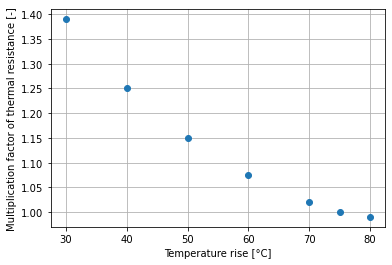

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# input data
x = np.transpose(np.array([80,75,70,60,50,40,30])) # temperature rise
y = np.transpose(np.array([0.99, 1, 1.02, 1.075, 1.15, 1.25, 1.39])) # multiplication factor

# plot the data 
plt.plot(x,y, 'o')
plt.xlabel('Temperature rise [°C]')
plt.ylabel('Multiplication factor of thermal resistance [-]')
plt.grid()
plt.show()


We want to express this relation with a polynomial model:

$\frac{R_{th,n}}{R_{th,n,75^{\circ} C}}=\beta _{0}+\beta _{1}.\Delta T+\beta _{2}.\Delta T^{2}$

For this model the relation between data and regression coefficients can be represented with a matrix notation:

\begin{align*}
Y=X.\beta +\varepsilon
\end{align*}

Equivalent to:

\begin{align*}
\left(\begin{array}{l}
y_{1}\\
\ldots \\
y_{p}
\end{array}\right)=\left(\begin{array}{lll}
1 & x_{11} & \ldots \\
\ldots & \ldots & \ldots \\
1 & x_{p1} & \ldots 
\end{array}\right)\left(\begin{array}{l}
\beta _{0}\\
\ldots \\
\beta _{p}
\end{array}\right)+\left(\begin{array}{l}
\varepsilon _{1}\\
\ldots \\
\varepsilon _{p}
\end{array}\right)
\end{align*}

with:  
 * $Y$, the output data vector: here $R_{th,n}/R_{th,n,70°C}$  
 * $X$, the input data matrix: here $\Delta T$  
 * $\beta$, the coefficients of model  

> Exercice 1: In the case of least square error assumption, demonstrate that the $\beta$ vector can be calculated with the following relation: $\beta=(X^tX)^{-1}X^tY$. Implement this calculation with python numpy functions: matrix products, matrix inversion and matrix tranposition (here a tutorial about [Matrix arithmetic](https://www.python-course.eu/matrix_arithmetic.php)). Plot the regression and the original data on the same plot. 

-------------------
*Student Work*


The parameters are : [ 1.93618886e+00 -2.22112013e-02  1.29959433e-04]


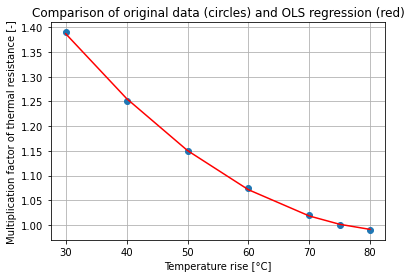

In [2]:
# Determination of the least squares estimator with matrix arithmetic

# Matrix X and Y
X=np.transpose(np.array((np.ones(np.size(x)), x, x**2 )))
Y=y.reshape((np.size(x),1))

# Vector Beta calculation
Beta=np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ y
print("The parameters are :",Beta)

# Y vector prediction
y_est=X @ Beta

# plot the data 
plt.plot(x,y, 'o',x,y_est, '-r')
plt.xlabel('Temperature rise [°C]')
plt.ylabel('Multiplication factor of thermal resistance [-]')
plt.title('Comparison of original data (circles) and OLS regression (red)')
plt.grid()
plt.show()

> Exercice 2: Compare your result with an [Ordinary Least Square](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html) (OLS) regression function of the [StatsModels](https://www.statsmodels.org/stable/index.html) package.  

Parameters:  [ 1.93618886e+00 -2.22112013e-02  1.29959433e-04]
R2:  0.999537051410613


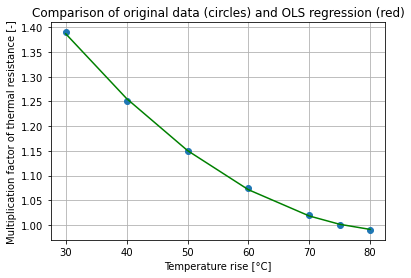

In [3]:
# Determination of the least squares estimator with the OLS function 
# of the SatsModels package

import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

import statsmodels.api as sm

model = sm.OLS(Y, X)
results = model.fit()

print('Parameters: ', results.params)
print('R2: ', results.rsquared)

# Y vector prediction
y_OLS=results.predict(X)

# plot the data 
plt.plot(x,y, 'o',x,y_OLS, '-g')
plt.xlabel('Temperature rise [°C]')
plt.ylabel('Multiplication factor of thermal resistance [-]')
plt.title('Comparison of original data (circles) and OLS regression (red)')
plt.grid()
plt.show()



### Identification of the most important dimensions

The objective of the estimation model sought here is to evaluate the thermal resistance in natural convection of a heat sink $R_{th,n}$ according to its dimensions (see Figure below). The statistical data are from a heat sinks catalog (standard extruded heat sinks of [Aavid Thermalloy](https://www.boydcorp.com/thermal/heat-sinks/extruded.html)). 

*Section of a heat sink (Length L)*
![HeatsinkSection](https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/HeatsinkSection.png)



The first step is to import catalog data stored in a .csv file. We use for that functions from [Panda](https://pandas.pydata.org/index.html) package (with here an [introduction to panda](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)). 

In [4]:
# Inmport Heatsink data

# Panda package Importation
import pandas as pd

# Read the .csv file with bearing data
path='https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/data/'
dHS = pd.read_csv(path+'DataHeatsink.csv', sep=';')

# Print the head (first lines of the file)
dHS.head()


,Rthn,Rthf,W,H,L,Wf,Df,Hs
0,13.20,5.15,19.0,4.8,150,0.6,1.9,1.1
1,11.37,3.82,19.0,6.0,150,0.8,2.3,1.1
2,0.98,0.46,134.3,19.2,150,1.6,10.8,4.0
3,8.79,3.06,24.0,7.3,150,1.5,3.8,2.3
4,7.52,3.83,37.5,3.1,150,1.0,2.6,1.1


> Exercice: By using a correlation analysis or a scatter matrix (here [examples](http://benalexkeen.com/correlation-in-python/)), identify the most important dimensions among $W, H, L, W_f, H_f, H_s$.

In [5]:
dHS.corr()

,Rthn,Rthf,W,H,L,Wf,Df,Hs
Rthn,1.000000,8.209009e-01,-5.478826e-01,-4.802456e-01,-3.165148e-01,-4.778697e-01,-4.781087e-01,-5.254152e-01
Rthf,0.820901,1.000000e+00,-6.057011e-01,-5.583399e-01,-5.116139e-17,-5.479748e-01,-5.231688e-01,-6.306939e-01
W,-0.547883,-6.057011e-01,1.000000e+00,1.690900e-01,6.672354e-17,3.767281e-01,4.783354e-01,2.661124e-01
H,-0.480246,-5.583399e-01,1.690900e-01,1.000000e+00,-1.768105e-17,5.042339e-01,2.310279e-01,7.317083e-01
L,-0.316515,-5.116139e-17,6.672354e-17,-1.768105e-17,1.000000e+00,4.331464e-17,2.623379e-16,1.531746e-16
Wf,-0.477870,-5.479748e-01,3.767281e-01,5.042339e-01,4.331464e-17,1.000000e+00,7.978588e-01,5.282451e-01
Df,-0.478109,-5.231688e-01,4.783354e-01,2.310279e-01,2.623379e-16,7.978588e-01,1.000000e+00,3.624208e-01
Hs,-0.525415,-6.306939e-01,2.661124e-01,7.317083e-01,1.531746e-16,5.282451e-01,3.624208e-01,1.000000e+00


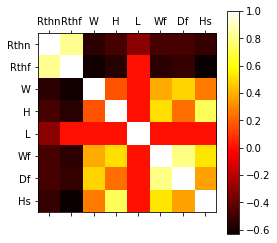

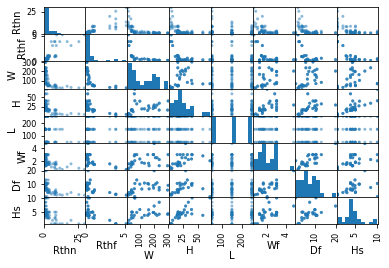

In [6]:
# Correlation matrix
plt.matshow(dHS.corr(), cmap='hot')
plt.xticks(range(len(dHS.columns)), dHS.columns)
plt.yticks(range(len(dHS.columns)), dHS.columns)
plt.colorbar()
plt.show()

# Scatter matrix
pd.plotting.scatter_matrix(dHS)
plt.show()

------------------------
*Student explanations*

#### Multiple linear regression

We want to perform here a multiple linear regression to determine an estimation model of the form.  
$R_{th,n}=a+bX+cY+dZ$

where:
 * ${a, b, c, d}$ are the coefficients of the model

 * ${X, Y, Z}$ are the most influential dimensions.

> Exercice: Perform this multiple linear regression with the [StatsModels](https://www.statsmodels.org/stable/index.html) package.


In [7]:
#student work

We want to compare the result with an estimation model of the form.  
$R_{th,n}=aX^{b}Y^{c}Z^{d}$

where:
 * ${a, b, c, d}$ are the coefficients of the model

 * ${X, Y, Z}$ are the most influential dimensions.

> Exercice: Complete the verification diagram with previous results and conclude about the best mathematical form to choose.

In [8]:
# Determination of the least squares estimator with the OLS function 
# of the SatsModels package

# log transformation of the data
dHSlog=pd.DataFrame(data=np.log10(dHS.values), columns=dHS.columns)

# Generation of Y and X matrix
YHS=dHSlog['Rthn'].values
YHS=YHS.reshape((np.size(YHS),1))
XHS=np.transpose(np.array((np.ones(np.size(dHSlog['W'].values)), dHSlog['W'].values, dHSlog['H'].values, dHSlog['L'].values)))

# OLS regression
modelHS = sm.OLS(YHS, XHS)
resultHS = modelHS.fit()

# Results print
print('Parameters: ', resultHS.params)
print('R2: ', resultHS.rsquared)

print('The estimation function is: Rthn = %.3g.W^%.2f.H^%3.2f.L^%.2f'
      %(10**resultHS.params[0],resultHS.params[1],resultHS.params[2],resultHS.params[3]))
print('with Rthn in [°/W], W,H and L in [mm]')

Parameters:  [ 4.27428462 -0.91835926 -0.55758774 -0.73      ]
R2:  0.9881820015880768
The estimation function is: Rthn = 1.88e+04.W^-0.92.H^-0.56.L^-0.73
with Rthn in [°/W], W,H and L in [mm]


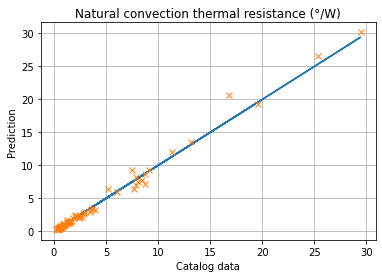

In [9]:
# Y vector prediction
y_HS=10**(resultHS.predict(XHS))

# plot the data 
#plt.plot(dHS['Rthn'].values,dHS['Rthn'].values, '-',dHS['Rthn'].values,y_HS, 'o')
plt.plot(dHS['Rthn'].values,dHS['Rthn'].values, '-')
plt.plot(dHS['Rthn'].values,y_HS, 'x')
plt.xlabel('Catalog data')
plt.ylabel('Prediction')
plt.title('Natural convection thermal resistance (°/W)')
plt.grid()
plt.show()